In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


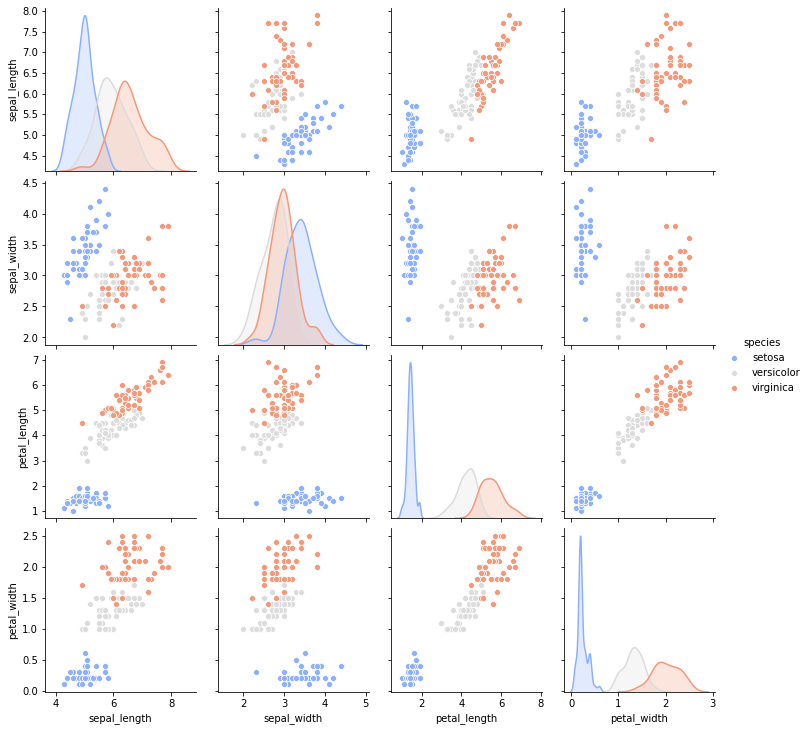

In [4]:
sns.pairplot(data=iris,hue='species',palette='coolwarm')

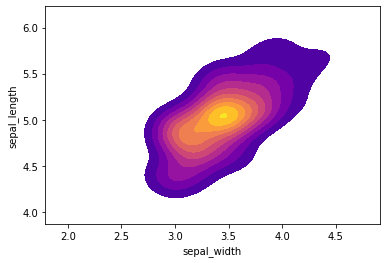

In [10]:
#setosa is more separable than versicolar & virginica
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],cmap='plasma',shade=True, shade_lowest=False)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3)

In [0]:
from sklearn.svm import SVC

In [0]:
svc_model = SVC()

In [16]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions = svc_model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.88      0.93        16
   virginica       0.91      1.00      0.95        21

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



[[ 8  0  0]
 [ 0 14  2]
 [ 0  0 21]]


In [0]:
#Grid Search Practice
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [22]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
grid_predictions = grid.predict(X_test)

In [24]:
print(classification_report(y_test,grid_predictions))
print('\n')
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.88      0.93        16
   virginica       0.91      1.00      0.95        21

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



[[ 8  0  0]
 [ 0 14  2]
 [ 0  0 21]]


In [0]:
#By default it gives best params and estimators